# Session 1
## Experiment 0
### Lab

**After finishing this Experiment, please go over to the LMS, and answer the Check For Understanding Questions under Experiment 0.**

In this experiment, we will see a simple data set which we will use for a kNN problem. We will read the data from a csv file using pandas and visualize it using matplotlib. The actual kNN computations are done in the next Experiment.

The objectives for this experiment are:
 * getting comfortable with Jupyter
 * getting familiar with pandas
 * getting familiar with matplotlib
 
To know more about pandas refer to:
 * The pandas Tutorial video in the Python Course in the LMS
 * The data munging Tutorial video in the Python Course in the LMS
 * Of course pandas' documentation is great too

To know more about matplotlib refer to:
 * The matplotlib Tutorial video in the Python Course in the LMS


### The problem and the data

Let us consider a simple situation. Given some data about a fruit.

Fruits are characterized by 
 * weight (in grams)
 * colour as an integer
     - 1 $\rightarrow$ red
     - 2 $\rightarrow$ orange
     - 3 $\rightarrow$ yellow
     - 4 $\rightarrow$ green
     - 5 $\rightarrow$ blue
     - 6 $\rightarrow$ purple
 * label as a string
     - "Apple" or "Banana"
     
Here are the details of the file:
  * 00-fruits.csv $\Rightarrow$ The input data. 
  * Has 18 lines
  * The first line is the header line
  * Each line contains weight in grams, colour code, and string "Apple", or "Banana"
  

In [2]:
# Let us first read the data from the file
import pandas as pd
data = pd.read_csv("../00-fruits.csv")
data

,Weight,Colour,Label
0,303,3,Banana
1,370,1,Apple
2,298,3,Banana
3,277,3,Banana
4,377,4,Apple
5,299,3,Banana
6,382,1,Apple
7,374,4,Apple
8,303,4,Banana
9,309,3,Banana


Note that the nice display above is due to pandas and Jupyter working together. 

We need to convert the label column data: Apples as A and Bananas as B. Here is the pandas code to do that. 

*Note the defensive conversion to lower() as well as returning an X for wrong data. Real world data will rarely be clean*

In [1]:
def fruitLabels(s):
    s = s.strip().lower()
    if s == "apple":
        return "A"
    if s == "banana":
        return "B"
    return "X"
import pandas as pd
data = pd.read_csv("../00-fruits.csv", converters={"Label":fruitLabels})
data

,Weight,Colour,Label
0,303,3,B
1,370,1,A
2,298,3,B
3,277,3,B
4,377,4,A
5,299,3,B
6,382,1,A
7,374,4,A
8,303,4,B
9,309,3,B


Before we start doing anything else, let us do some exploration. Let us plot the weight and color distribution.

In [2]:
import matplotlib.pyplot as plt
plt.plot(data.Weight, data.Colour, ".")
plt.show()

But this is not very useful. So let us separate the data we have into apples and bananas and print them in different colours

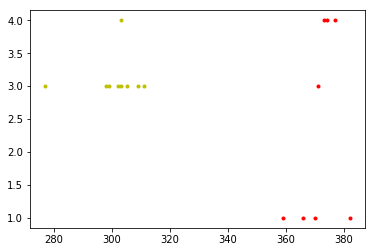

In [5]:
apples = data[data.Label == "A"]
bananas = data[data.Label == "B"]
plt.plot(apples.Weight, apples.Colour, "r.")
plt.plot(bananas.Weight, bananas.Colour, "y.")
plt.show()

Let us add some labels to make the chart better 

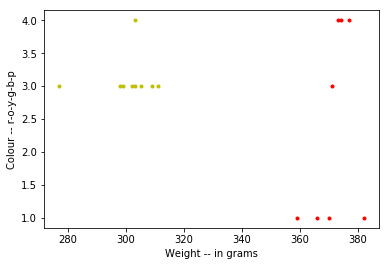

In [6]:
plt.plot(apples.Weight, apples.Colour, "r.")
plt.plot(bananas.Weight, bananas.Colour, "y.")
plt.xlabel("Weight -- in grams")
plt.ylabel("Colour -- r-o-y-g-b-p")
plt.show()

**Exercise 1** :: Change the points for Apples to big circles and the points for Bananas to crosses. Edit the areas marked with ??? in the code below.

**Exercise 2** :: Add a legend

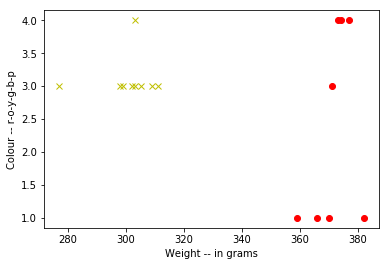

In [7]:
plt.plot(apples.Weight, apples.Colour, "ro")
plt.plot(bananas.Weight, bananas.Colour, "yx")
plt.xlabel("Weight -- in grams")
plt.ylabel("Colour -- r-o-y-g-b-p")
plt.show()

We  see that similar fruits come close in the weight, color space? Now let us plot two sample sample data in black.

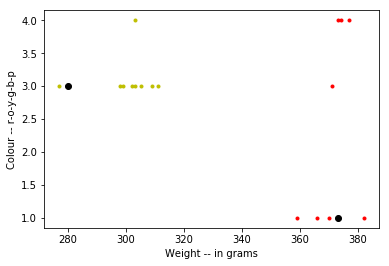

In [8]:
plt.plot(apples.Weight, apples.Colour, "r.")
plt.plot(bananas.Weight, bananas.Colour, "y.")
plt.xlabel("Weight -- in grams")
plt.ylabel("Colour -- r-o-y-g-b-p")
plt.plot([373, 280], [1, 3], "ko")
plt.show()

Now we can infer that the fruit (373, 1) is most likely to be an apple and the fruit (280, 3) is most probably a banana. 

The job for us now is to instead of eyeballing it one at a time like above, use a kNN classifier with different $k$ values, using different distance functions, to determine the correct label for some new data -- that is not in 00-fruits.csv

Let us first write a simple distance function to calculate the distance between two fruits.

In [9]:
import math
def dist(a, b):
    sqSum = 0
    for i in range(len(a)):
        sqSum += (a[i] - b[i]) ** 2
    return math.sqrt(sqSum)

Now let us find the distance between the fruits in line 0 and line 1 in the  data set. We use values attribute to get an array of the dataframe.

In [14]:
f0 = data.values[0]
print(f0)
f1 = data.values[1]
print(f1)

[303 3 'B']
[370 1 'A']


In [11]:
dist(f1[:2], f0[:2])

67.02984409947557

Now let us find the distance between the fruits in line 0 and line 2 in the data set. 

In [15]:
f2 = data.values[2]
dist(f2[:2], f0[:2])

5.0

**Exercise 3** :: Find the distance between the fruits in line 2, and line 1


In [17]:
dist(f2[:2],f1[:2])

72.02777242147643

## Acknowledgment
This fruits data is based on the blog post http://www.jiaaro.com/KNN-for-humans. 